In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [6]:
data = {}
f_list = ['solTestX', 'solTestY', 'solTrainX', 'solTrainY']

for f in f_list:
    data[f] = pd.read_csv('./data/' + f + '.csv', index_col = 0)
    

In [7]:
train_data = data['solTrainX']
train_label = data['solTrainY']
test_data = data['solTestX']
test_label = data['solTestY']

In [8]:
train_data.shape, train_label.shape

((951, 228), (951, 1))

In [10]:
x, y = torch.from_numpy(train_data.values).float(), torch.from_numpy(train_label.values).float()
x, y

(tensor([[ 0.0000,  1.0000,  0.0000,  ..., -1.6065,  6.8125,  6.8125],
         [ 0.0000,  1.0000,  0.0000,  ..., -0.4413,  9.7538, 12.0296],
         [ 1.0000,  1.0000,  1.0000,  ..., -0.3849,  8.2453,  8.2453],
         ...,
         [ 1.0000,  0.0000,  1.0000,  ..., -1.4838,  5.4565,  5.4565],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.5332,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  1.0000,  ..., -1.3834,  3.8371,  3.8371]]),
 tensor([[-3.9700e+00],
         [-3.9800e+00],
         [-3.9900e+00],
         [-4.0000e+00],
         [-4.0600e+00],
         [-4.0800e+00],
         [-4.0800e+00],
         [-4.1000e+00],
         [-4.1000e+00],
         [-4.1100e+00],
         [-4.1100e+00],
         [-4.1200e+00],
         [-4.1400e+00],
         [-4.1400e+00],
         [-4.1500e+00],
         [-4.1600e+00],
         [-4.1600e+00],
         [-4.1600e+00],
         [-4.1600e+00],
         [-4.1700e+00],
         [-4.1800e+00],
         [-4.1900e+00],
         [-4.1900e+00],
      

In [17]:
model = nn.Linear(228, 1, bias=True)

In [18]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [19]:
for step in range(50000):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5000 == 0:
        print("Step: %d, Cost: %.4f" % (step, cost.item()))

Step: 1, Cost: 12.2157
Step: 5001, Cost: 1.8369
Step: 10001, Cost: 1.5827
Step: 15001, Cost: 1.4384
Step: 20001, Cost: 1.3223
Step: 25001, Cost: 1.2261
Step: 30001, Cost: 1.1454
Step: 35001, Cost: 1.0772
Step: 40001, Cost: 1.0191
Step: 45001, Cost: 0.9693


In [20]:
x_test = torch.from_numpy(test_data.values).float()
y_test = torch.from_numpy(test_label.values).float()

In [21]:
y_predict = model(x_test)

In [22]:
from sklearn import metrics
print("R2 Score = ", metrics.r2_score(y_test.data, y_predict.data))

R2 Score =  0.7861173372313636


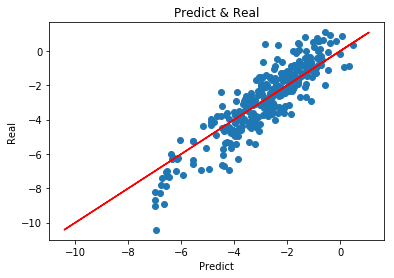

In [23]:
plt.scatter(y_predict.data.numpy(), y_test.data.numpy())

plt.title('Predict & Real')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.plot(y_test.data.numpy(), y_test.data.numpy(), 'r-')
plt.show()